In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [36]:
crime = pd.read_csv("../crime.csv")
offense_codes = pd.read_csv("../offense_codes.csv")

In [37]:
crime.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [38]:
offense_codes.head()

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID,OFFENSE_CATEGORY_NAME,IS_CRIME,IS_TRAFFIC
0,2804,1,stolen-property-possession,Possession of stolen property,all-other-crimes,All Other Crimes,1,0
1,2804,2,fraud-possess-financial-device,Possession of a financial device,all-other-crimes,All Other Crimes,1,0
2,2901,0,damaged-prop-bus,Damaged business property,public-disorder,Public Disorder,1,0
3,2902,0,criminal-mischief-private,Criminal mischief to private property,public-disorder,Public Disorder,1,0
4,2903,0,criminal-mischief-public,Criminal mischief to public property,public-disorder,Public Disorder,1,0


In [39]:
crime.sort_values("REPORTED_DATE", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 
crime

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
287972,20162031,20162031220400,2204,0,burglary-residence-no-force,burglary,1/1/2016 9:42:00 PM,1/1/2016 9:43:00 PM,1/1/2016 10:06:00 PM,1401 N MONACO ST,3165036.0,1694415.0,-104.913156,39.738510,2,222,montclair,1,0
310495,2016823,2016823544100,5441,0,traffic-accident,traffic-accident,1/1/2016 8:30:00 AM,NaN,1/1/2016 10:09:00 AM,I25 HWYNB / W 6TH AVE,3136918.0,1689574.0,-105.013229,39.725676,1,123,baker,0,1
366833,2016923,2016923299901,2999,1,criminal-mischief-mtr-veh,public-disorder,12/31/2015 11:30:00 PM,1/1/2016 7:55:00 AM,1/1/2016 10:10:00 AM,2200 BLK N VINE ST,3151305.0,1698417.0,-104.961896,39.749729,6,622,city-park-west,1,0
160214,2016901,2016901299900,2999,0,criminal-mischief-other,public-disorder,1/1/2016 9:50:00 AM,NaN,1/1/2016 10:12:00 AM,9888 E VASSAR DR,3177077.0,1669276.0,-104.870960,39.669277,3,323,hampden,1,0
273034,2016901,2016901230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,1/1/2016 9:50:00 AM,NaN,1/1/2016 10:12:00 AM,9888 E VASSAR DR,3177077.0,1669276.0,-104.870960,39.669277,3,323,hampden,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435912,20196008892,20196008892230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,9/7/2019 3:00:00 PM,9/7/2019 6:30:00 PM,9/9/2019 9:44:00 AM,2525 S DAYTON WAY,3175792.0,1669748.0,-104.875513,39.670597,3,323,hampden,1,0
434324,2019575447,2019575447540100,5401,0,traffic-accident-hit-and-run,traffic-accident,9/9/2019 7:50:00 AM,NaN,9/9/2019 9:50:00 AM,100 BLOCK E 12TH AVE,3144612.0,1693087.0,-104.985805,39.735204,6,623,capitol-hill,0,1
435100,20196008928,20196008928239900,2399,0,theft-other,larceny,9/9/2019 5:45:00 PM,9/9/2019 5:45:00 PM,9/9/2019 9:53:00 PM,3445 N YORK ST,3151776.0,1704123.0,-104.960100,39.765386,2,211,cole,1,0
440558,2019575683,2019575683570700,5707,0,criminal-trespassing,all-other-crimes,9/9/2019 9:58:00 AM,NaN,9/9/2019 9:58:00 AM,3737 N KALAMATH ST,3140290.0,1705280.0,-105.000935,39.768742,1,113,highland,1,0


In [58]:
crime.index = pd.DatetimeIndex(crime["FIRST_OCCURRENCE_DATE"])
print("De eerste overtreding in de dataset is op {} en de laatste overtreding is op {}".format(crime.index.min(), crime.index.max()))
periode = crime.index.max() - crime.index.min() 
print("De dataset bestaat uit %s dagen" %(periode.days))
gemiddelde = len(crime.index) / periode.days
print("Het gemiddelde aantal overtredingen op een dag is {}".format(gemiddelde))

De eerste overtreding in de dataset is op 2015-01-02 00:00:00 en de laatste overtreding is op 2019-12-31 23:52:00
De dataset bestaat uit 1824 dagen
Het gemiddelde aantal overtredingen op een dag is 184.3843201754386


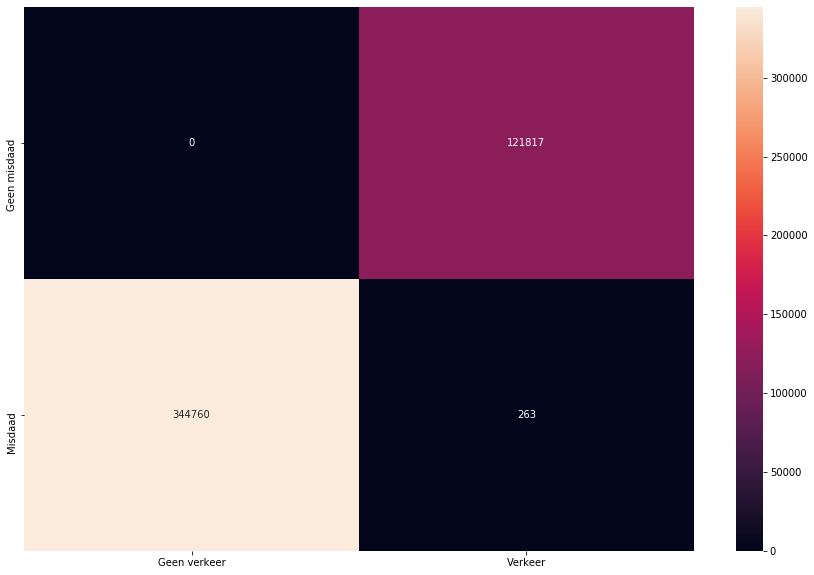

In [41]:
plt.figure(figsize=(15,10))
crime_and_traffic = pd.crosstab(index=crime['IS_CRIME'],
                                columns=crime['IS_TRAFFIC'])
crime_and_traffic.index = ["Geen misdaad", "Misdaad"]
crime_and_traffic.columns = ["Geen verkeer", "Verkeer"]
sns.heatmap(crime_and_traffic, annot=True, fmt="d")

In [42]:
crime = crime[crime.IS_CRIME != 0]

In [43]:
crime.FIRST_OCCURRENCE_DATE = pd.to_datetime(crime.FIRST_OCCURRENCE_DATE)
crime["HOUR"] = crime.FIRST_OCCURRENCE_DATE.dt.hour
crime["DAY"] = crime.FIRST_OCCURRENCE_DATE.dt.day
crime["DAY_OF_WEEK"] = crime.FIRST_OCCURRENCE_DATE.dt.dayofweek
crime["MONTH"] = crime.FIRST_OCCURRENCE_DATE.dt.month
crime["YEAR"] = crime.FIRST_OCCURRENCE_DATE.dt.year
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
weekdays = ["Zondag", "Maandag", "Dinsdag", "Woensdag", "Donderdag", "Vrijdag", "Zaterdag"]

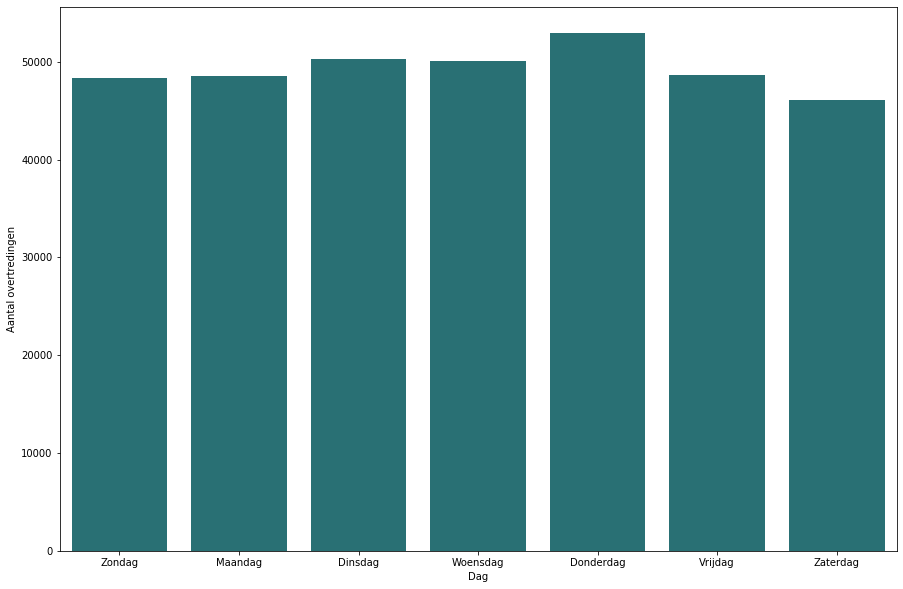

In [44]:
week_crime = pd.DataFrame(crime["DAY_OF_WEEK"].value_counts()).sort_index()
week_crime["DAY"] = weekdays
week_crime.columns = ["Aantal overtredingen", "Dag"]
plt.figure(figsize=(15,10))
sns.barplot(x="Dag", y="Aantal overtredingen", color="#1c7b80", data=week_crime)


Door middel van de bovenstaande grafiek is te zien op welke dagen de meeste overtredingen worden gemaakt. Op Donderdag zijn er iets meer overtredingen en op Zaterdag iets minder. 

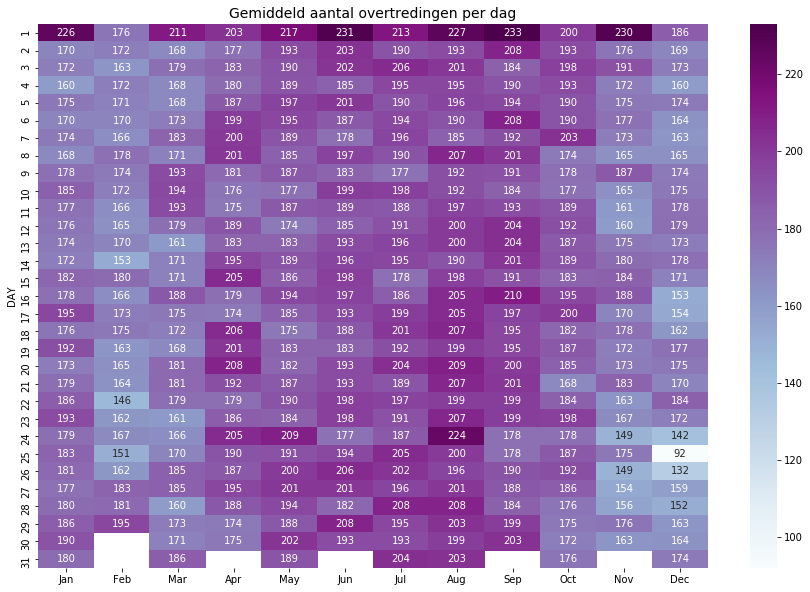

In [45]:
crimes_pt = crime.pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=len)
crimes_pt_year_count = crime.pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=lambda x: len(x.unique()))
crimes_avg = crimes_pt / crimes_pt_year_count
crimes_avg.columns = months
plt.figure(figsize=(15,10))
plt.title('Gemiddeld aantal overtredingen per dag', fontsize=14)
sns.heatmap(crimes_avg.round(), cmap='BuPu', cbar=True, annot=True, fmt=".0f")

Aan de heatmap is te zien dat in de zomermaanden gemiddeld meer overtredingen plaatsvinden dan gemiddeld. 

Ik wil graag weten of er rond bepaalde feestdagen meer overtredingen plaatsvinden. 

> De Amerikaanse feestdagen: 
- 25 December - Kerstmis -> Rond kerst zijn er gemiddeld veel minder overtredingen
- 22-28 November - Thanksgiving -> Rond kerst zijn er gemiddeld minder overtredingen 
- 8-14 Mei - Moederdag -> Niet veel verschil
- 4 Juli - Independence Day -> Een dag voor deze feestdag zijn er meer overtredingen
- 15-21 Juni - Vaderdag -> Rond vaderdag zijn er gemiddeld iets meer overtredingen
- 31 Oktober - Halloween -> Een dag na Halloween zijn er veel meer overtredingen
- 14 Februari - Valentijnsdag -> Op valentijnsdag zijn er minder overtredingen
- 17 Maart - St Patrick's Day - Niet veel verschil
- 31 December - Oud en Nieuw - Een dag na de feestdag zijn er gemiddeld veel meer overtredingen. 






Ik wil graag kijken of in de zomermaanden de misdaad toeneemt of afneemt gedurende de jaren. 
Dit doe ik eerst voor heel Denver en daarna per district 





In [46]:
zomermaanden = ['Jun','Jul','Aug','Sep']
#crime['REPORTED_DATE'] = crime['REPORTED_DATE'].str.split(' ').str[0]
#crime['REPORTED_DATE'] = crime['REPORTED_DATE'].str[-4:]
#indexNames = crime[crime['REPORTED_DATE']== '2020'].index
#crime.drop(indexNames, inplace=True)
#crime['REPORTED_DATE'].unique()


array(['2016', '2017', '2018', '2019', '2015'], dtype=object)